In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import arabic_reshaper
from arabic_reshaper import reshape
from bidi.algorithm import get_display

#### Read dataset

In [2]:
df = pd.read_csv(r'../data/PICKED.csv')
df.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15536\393864635.py:1: DtypeWarning: Columns (4,5,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'../data/PICKED.csv')


,link,type,date,address,area,infrastructure,floors_sum,homes_num,floor_num,rooms,...,parking,desc,price,mortgage,rent,facilities,Dollar,address_no_digits,region,area_text
0,https://www.melkeirani.com/old/melk-77925-%D9%...,فروش آپارتمان,1398/01/17,ارمغان 7,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",4,4,3,2,...,دارد,وکالتی,250000000.0,NaN,NaN,"آبگرمکن,بخاری,پارکینگ,تراس,اپن,کمد دیواری,هود,",13391,ارمغان,11,ه9
1,https://www.melkeirani.com/old/melk-77923-%D9%...,فروش آپارتمان,1398/01/17,هاشمیه 59,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",3,7,3,2,...,دارد,شش دانگ ملک,695000000.0,NaN,NaN,"شوفاژ,پکیج,انباری,پارکینگ,تراس,اپن,آیفون تصویر...",13391,هاشمیه,9,٢ ١ ١
2,https://www.melkeirani.com/old/melk-77917-%D9%...,فروش آپارتمان,1398/01/17,بین حسابی جنوبی 11 و 13,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",6,24,5,2,...,دارد,شش دانگ ملک,370000000.0,NaN,NaN,"انباری,پارکینگ,تراس,پنجره دوجداره,نگهبان,آسانس...",13391,حسابی جنوبی,10,٨ 1
3,https://www.melkeirani.com/old/melk-77922-%D9%...,فروش آپارتمان,1398/01/17,کوثر شمالی 30,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",4,8,3,2,...,دارد,شش دانگ ملک,450000000.0,NaN,NaN,"آبگرمکن,بخاری,انباری,پارکینگ,تراس,اپن,آیفون تص...",13391,کوثر شمالی,9,٨ 1
4,https://www.melkeirani.com/old/melk-77909-%D9%...,فروش آپارتمان,1398/01/17,بین حسابی شمالی 35 و 37,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",4,4,2,3,...,دارد,شش دانگ ملک,962500000.0,NaN,NaN,"شوفاژ,پکیج,اطفاء حریق,انباری,پارکینگ,تراس,پنجر...",13391,حسابی شمالی,10,٧٥ ١


<Axes: >

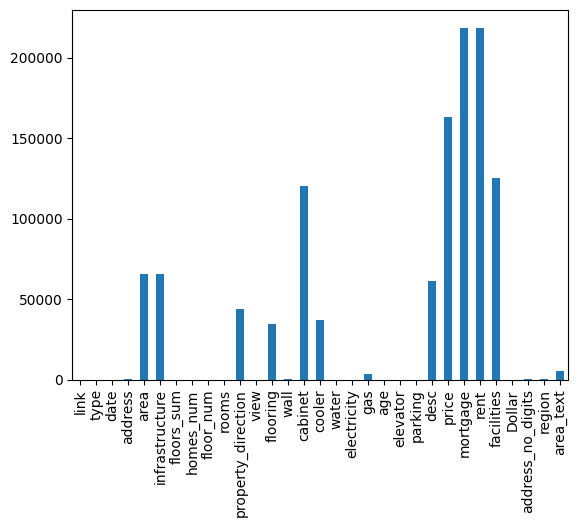

In [3]:
df.isna().sum().plot(kind='bar')

## value counts of Ads type

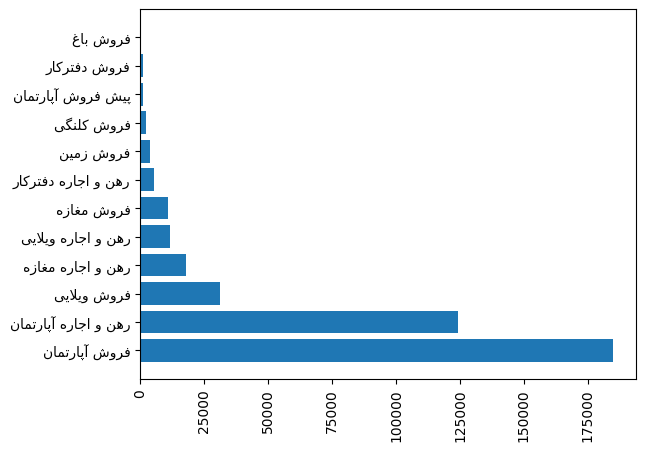

In [4]:
ind=df['type'].value_counts().index
persian_ind= [get_display(reshape(ind)) for ind in ind]
value_counts = df['type'].value_counts()
plt.barh(persian_ind, value_counts)
plt.xticks(rotation=90)
plt.show()

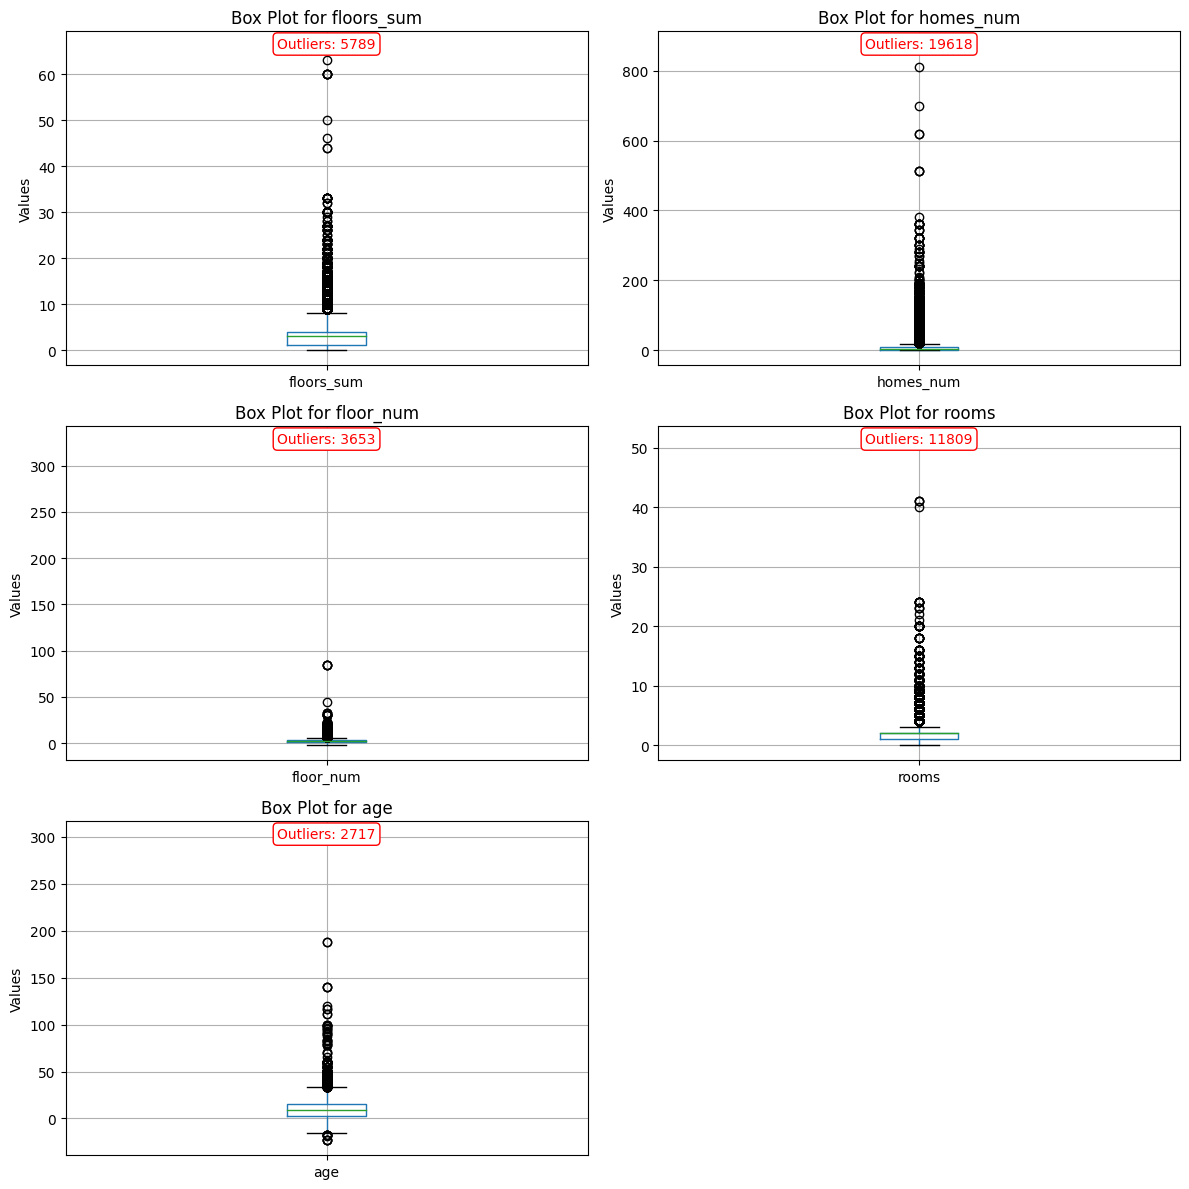

In [5]:
columns_to_plot = ['floors_sum', 'homes_num', 'floor_num', 'rooms', 'age']

# Create a 3x2 grid of subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

for i, column in enumerate(columns_to_plot):
    row, col = divmod(i, 2)  # Calculate row and column index for 3x2 grid

    # Calculate IQR and outliers
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # Plot boxplot
    df[[column]].boxplot(ax=axes[row, col])
    axes[row, col].set_title(f'Box Plot for {column}')
    axes[row, col].set_ylabel('Values')

    # Add outlier count as text annotation
    outlier_count = len(outliers)
    axes[row, col].annotate(
        f'Outliers: {outlier_count}', 
        xy=(0.5, 0.95), 
        xycoords='axes fraction', 
        ha='center', 
        fontsize=10, 
        color='red', 
        bbox=dict(boxstyle='round,pad=0.3', edgecolor='red', facecolor='white')
    )

# Remove the unused subplot (bottom right in the 3x2 grid if necessary)
if len(columns_to_plot) < 6:
    fig.delaxes(axes[2, 1])

plt.tight_layout()
plt.show()


In [5]:
df.dropna(subset=['type'],inplace=True)
df['age'] = df['age'].astype('int')
df.loc[df['age'] > 1300, 'age'] = df['age'] - df['date'].str.split('/').str[0].astype(int)

### find all unique streets

In [6]:
df['address_no_digits'] = df['address'].str.replace(r'\d+|/|\bو\b|\bبین\b', '', regex=True).str.strip()

### make region column

In [13]:
regions = {
    1: [
        "احمد آباد", "راهنمایی", "فلسطین", "آبکوه", "ارشاد", "سجاد", "کفایی","پرستار","تورج","ملاصدرا","ابومسلم","بزرگمهر جنوبی","عارفی","هجرت","بعثت"
        "گوهرشاد", "کلاهدوز", "کوی دکتری", "صاحب الزمان", "سعد آباد", "شهید دستغیب","سناباد","احمدآباد","خیام","قرنی","قاضی طباطبایی","صادقی","سنایی","فرهاد","بیستون","ابوذرغفاری","ابوذر غفاری",
        "دانشگاه","بخارایی","عارف","پاستور","بنفشه","ناصرخسرو","بابک","ابن سینا","محتشمی","اسفندیانی","بهشت","ناصر خسرو","عدالت","توفیق","دانشسرا","سجاد - بهارستان","حامدجنوبی",
        "گوهرشاد"
    ],
    2: [
        "سپاد", "خین عرب", "کوشک مهدی", "عبادی", "مطهری", "ابوطالب", "کیان سنتر"
        "کوی امیرالمؤمنین", "فدک", "بهاران", "جانباز", "فرامرز عباسی", "هنرور", 
        "نوده", "کارخانه قند", "ابوطالب", "عبدالمطلب", "هدایت", "ایثارگران", 
        "شفا", "سمزقند", "شهید هنرور", "شهید مطهری", "حسین باشی", "آیت الله عبادی", 
        "کاشانی", "زرکش", "مشهدقلی", "نوده", "حجت", "خین عرب", "قدس", "نوید", "اسماعیل آباد","مطهری شمالی","شهید مطهری شمالی","فرامرز","موسوی قوچانی","نسترن"
        "مجد","خیام شمالی","کریمی","شهید کریمی","حرعاملی","حر عاملی","مطهری جنوبی","ساجدی","چراغچی","مهدی","ثمانه","عامل","کامیاب","ذوالفقار","امیر","توس","پردیس","خیبر",
        "فخر","یاس","تلاش","مجتمع تجاری پروما","توحید","علیزاده","نسترن"
    ],
    3: [
        "چهارراه شهدا", "خیابان شهید کامیاب", "رسالت جنوبی", "بزرگراه شهید میرزایی", "الماس شرق"
        "میدان امام حسین", "چهارراه گاز", "محله سیس آباد", "خواجه ربیع", "محله بلال", "امید","مجد"
        "شهرک مهرگان", "خیر آباد", "فاطمیه", "گاز", "مسلم", "رسالت", "راه آهن", "مسلم جنوبی","فرامرز - رسالت"
        "بهمن", "مهر مادر", "مهر مادر شمالی", "قرقی", "عباس آباد", "دروی", "طبرسی شمالی","حرم مطهر","شهرستانی","مسلم شمالی","مسلم","هاشمی‌نژاد","هاشمی نژاد"
    ],
    4: [
        "پنجتن", "کشف رود", "شهید مفتح", "امت", "شهید آوینی", "بزرگراه شهید بابانظر", 
        "شهید گمنام", "وحدت", "مجلسی شرقی", "طبرسی جنوبی", "تقاطع غیرهمسطح فجر", 
        "ایثار", "فجر", "وحید", "تلگرد", "کوی مهدی", "گلشور", "طلاب", "التیمور", 
        "رده", "شهید قربانی"
    ],
    5: [
        "مهدی آباد", "ثامن", "امیرالمؤمنین", "شهید آوینی", "نیزه", "مهرآباد", 
        "جلالیه", "رضاییه", "سجادیه", "کوی سلمان", "حسین آباد","کوی امیرالمومنین","امیرالمومنین"
    ],
    6: [
        "شهرک شیرین", "آقا مصطفی خمینی", "امیرآباد", "شهید معقول", "کشاورز", 
        "شهید رجایی", "پورسینا", "کنه بیست", "اروند", "انصار", "شهید باهنر", 
        "شهید بسکآبادی", "چهنو", "مصلی", "کارمندان دوم", "کارمندان اول", "شهید رستمی", 
        "شیرودی", "کوی 22 بهمن","چمن","صفدری نژاد"
    ],
    7: [
        "کوی پلیس", "کوشش", "مقدم", "17 شهریور", "کارگران", "پروین اعتصامی", 
        "طرق 2", "زارعین", "ابوذر", "انقلاب", "بهارستان", "خلج", "قائم", "فرودگاه","فرودگاه"
        "المهدی", "سیدی", "عسگریه", "عنصری","شهریور","هفده شهریور","فلکه ضد ( خرداد)","خرداد","فدائیان اسلام"
    ],
    8: [
        "سرشور", "جنت", "آبشار", "بهشتی", "امام خمینی", "امام رضا","کوه سنگی","کوهسنگی","جهان آرا","شهرک طالقانی","نامجو","سعدی","پارس","میدان عدل خمینی","حکیم نظامی",
        "همت","فلکه برق (میدان بسیج)","دی","زیست خاور","بهار","جهان ارا","آبادگران","چهارراه مخابرات","دانش","سلامی","برج مهر کوهسنگی","مجتمع زیست خاور","کوهسنگی - رودکی",
        "امیرکبیر","خمینی"
    ],
    9: [
        "طالقانی", "زکریا", "سرافرازان", "چهارچشمه", "کوثر", "رضاشهر", 
        "نوفل", "نیروهوایی", "شقایق 1", "شقایق 2", "گلدیس", "ولیعصر", "انتهای دلاوران"
        "لادن", "اقبال", "آب و برق", "هنرستان", "هاشمیه","لاله","فکوری","صیاد","صیاد شیرازی","هفت تیر","پیروزی","فکوری","محله سرافرازان",
        "نماز","صدف","صارمی","خاقانی","ارغوان","زیتون","پایداری","کوثرشمالی","کوثر شمالی","محله هنرستان","هنرستان","محله کوثر","صابر","نخل","رهایی","رودکی"
        ,"محله چهارچشمه","کوثرجنوبی","کوثر جنوبی","ویلا","حافظیه","دهخدا","برونسی","نیاوران","دلاوران","حافظ","نارنج","غزال","سرافراز","فرخی","سامانیه","صیادشیرازی",
        "حق شناس","برکپور","سرو","کاوه","گلشن","انوری","میرکی","نوکاریزی","کلانتری","برسلانی","طیاری","لادن"
    ],
   10: [
        "رازی", "شریعتی", "شاهد", "فرهنگیان", "رسالت", "لشگر", "امامیه", "ادیب شمالی","راستی","امام دوست","راستان","میدان مادر","میدان حجاب","حجاب"
        "حجاب", "ایثارگران", "استاد یوسفی", "امام هادی", "خاتم الانبیا","قاسم‌آباد (شهرک غرب)" , "قاسم آباد","اندیشه","فلاحی","یوسفیه","رفیعی","مشکینی","حسابی","حسابی شمالی","ادیب"
        "شهرآرا", "رستگاری","بهورز","حسابی جنوبی","ادیب جنوبی","میعاد","آزادی","نهضت","شهرآرا","رادان","ابرار","استادیوسفی","استاد یوسفی","مروارید","هاشمی مهنه","چهارراه رستگاری","رستگاری"
    ],
    11: [
        "آزادشهر", "سیدرضی", "دانش آموز", "دانشجو", "شریف", "فارغ التحصیلان", "مهران"
        "تربیت", "شهید رضوی", "زیباشهر", "فرهنگ","امامت","جلال","جلال آل احمد","معلم","آزاده","آموزگار","ستاری","قانع","ارمغان","آرمان","سروش","دندانپزشکان","معاد",
        "استقلال","دندان پزشکان","شهیدقانع","شهید قانع","مدرس","دانش اموز","دادگر","سیدمرتضی","سید مرتضی","مهران"
    ],
    12: [
        "وکیل آباد", "امیریه", "الهیه", "مجیدیه", "جاهدشهر", "نمایشگاه", "رفسنجانی","مهدیه"
        "صفی آباد", "رحمانیه", "نقویه", "صادقیه", "کلاته برفی", "چهاربرج", "فردوسی","اقدسیه","محمدیه","عصمتیه","میثاق","محله جاهدشهر","جاهدشهر","بوستان","تقویه"
    ],
    13:[
        "گلبهار - جمهوری","گلبهار","گلبهار جمهوری","گلبهار - فروردین","گلبهار فروردین"
    ]
}


In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from rapidfuzz import process, fuzz  # Import سریع برای rapidfuzz
import pandas as pd
import numpy as np

# Preprocess regions
regions_flat = [(region, neighborhood) for region, neighborhoods in regions.items() for neighborhood in neighborhoods]
region_df = pd.DataFrame(regions_flat, columns=["region", "neighborhood"])

# Preprocess text normalization function
def normalize_text(text):
    text = text.strip().lower()
    text = text.replace("ي", "ی").replace("ك", "ک")
    return text

region_df["neighborhood"] = region_df["neighborhood"].apply(normalize_text)

# Vectorize with CountVectorizer
vectorizer = CountVectorizer().fit(region_df["neighborhood"])
region_vectors = vectorizer.transform(region_df["neighborhood"])

# Function to find region
def find_region(address):
    if pd.isna(address):
        return np.nan
    address = normalize_text(address)

    # 1. Exact match check
    for region, neighborhoods in regions.items():
        if address in map(normalize_text, neighborhoods):
            return region

    # 2. Cosine similarity fallback
    address_vector = vectorizer.transform([address])
    similarities = cosine_similarity(address_vector, region_vectors)
    max_index = np.argmax(similarities)
    max_similarity = similarities[0, max_index]

    # Dynamic threshold for cosine similarity
    threshold = np.mean(similarities) + 0.5 * np.std(similarities)
    if max_similarity > threshold:
        return region_df.iloc[max_index]["region"]

    # 3. Fuzzy matching fallback
    matches = process.extract(address, region_df["neighborhood"].tolist(), scorer=fuzz.partial_ratio, limit=1)
    if matches and matches[0][1] > 80:  # Threshold for fuzzy match (e.g., 80)
        matched_neighborhood = matches[0][0]
        return region_df.loc[region_df["neighborhood"] == matched_neighborhood, "region"].values[0]

    # 4. Default to unknown
    return "نامشخص"

# Apply the function
df["region"] = df["address_no_digits"].apply(find_region)


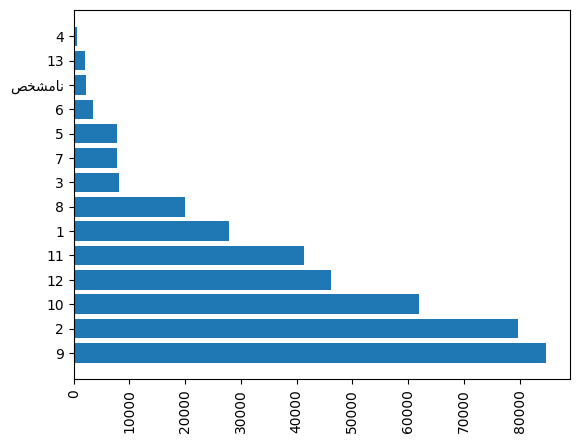

In [18]:
ind = df["region"].value_counts().index  # This is the index of value counts
persian_ind = [get_display(reshape(str(region))) for region in ind]  # Convert each index to string and reshape

# Get the value counts
value_counts = df["region"].value_counts()

# Plot the horizontal bar chart
plt.barh(persian_ind, value_counts)
plt.xticks(rotation=90)
plt.show()

In [33]:
df['facilities'] = df['facilities'].str.replace('[\[\]\"]', '', regex=True)
# facilities_dummies = df['facilities'].str.get_dummies(sep=',')

# # Combine with the original DataFrame (optional)
# df = pd.concat([df, facilities_dummies], axis=1)

In [27]:
facilities_dummies = df['facilities'].str.get_dummies(sep=',')

In [ ]:
f =facilities_dummies.columns.to_list()

In [31]:
print(f)

['  بسیار بزرگ ', '  دسترسی آسان به امکانات ', " ''", " '10 متر تراس'", " '90 مترحیاط اختصاصی'", " 'آبگرمکن'", " 'آسانسور'", " 'آلاچیق'", " 'آنتن مرکزی'", " 'آیفون تصویری'", " 'استخر'", " 'اسپیلیت'", " 'اطفاء حریق'", " 'انباری بالای حمام'", " 'انباری'", " 'اپن'", " 'باربی کیو'", " 'باربیکیو'", " 'باز سازی شده صفر تا صد'", " 'باز سازی شده'", " 'باز سازی شدهاتاق ها کاغذ دیواری'", " 'بازسازی شده'", " 'بخاری'", " 'تابلو'", " 'تخلیه'", " 'تراس 3 متری'", " 'تراس'", " 'تمیز'", " 'تهویه مطبوع'", " 'توالت فرنگی'", " 'جارومرکزی'", " 'جزیره'", " 'جکوزی'", " 'حمام مستر'", " 'حیاط'", " 'خواب مستر'", " 'درب الکترونیکی'", " 'درب برقی'", " 'درب ضد سرقت'", " 'درب ضدسرقت'", " 'درب مجزا'", " 'دربست'", " 'دزدگیر'", " 'دو تراس'", " 'دوبلکس'", " 'دوربین مدار بسته'", " 'دوربین مداربسته'", " 'زیرزمین'", " 'سرویس ایرانی و فرنگی'", " 'سرویس بهداشتی'", " 'سرویس فرنگی ایرانی'", " 'سونا'", " 'شوتینگ زباله'", " 'شوفاژ'", " 'شومینه'", " 'شیرآلات توکار'", " 'شیشه سکوریت'", " 'صفر تا صد باز سازی شده'", " 'فرنگی وال هن

In [5]:
df.to_csv('../data/PICKED.csv',encoding='utf-8-sig',index=False)

In [3]:
import base64
from PIL import Image
from io import BytesIO
import easyocr
import pandas as pd
from tqdm import tqdm  # نمایش نوار پیشرفت

# مقداردهی اولیه easyocr
reader = easyocr.Reader(['fa'])

def decode_and_extract_text(base64_string):
    try:
        if base64_string.startswith("data:image"):
            # حذف پیشوند و دیکد کردن رشته Base64
            base64_data = base64_string.split(",")[1]
            image_data = base64.b64decode(base64_data)
            
            # باز کردن تصویر و افزودن پس‌زمینه سفید
            image = Image.open(BytesIO(image_data)).convert("RGBA")
            white_background = Image.new("RGBA", image.size, "WHITE")
            image_with_background = Image.alpha_composite(white_background, image).convert("RGB")
            
            # تغییر اندازه تصویر برای بهبود دقت OCR
            resize_factor = 3
            new_size = (image_with_background.width * resize_factor, image_with_background.height * resize_factor)
            resized_image = image_with_background.resize(new_size, Image.Resampling.LANCZOS)
            
            # ذخیره موقت تصویر در حافظه
            image_buffer = BytesIO()
            resized_image.save(image_buffer, format="JPEG")
            image_bytes = image_buffer.getvalue()
            
            # انجام عملیات OCR
            results = reader.readtext(image_bytes)
            return " ".join([result[1] for result in results])
        return base64_string
    except Exception as e:
        return f"Error: {e}"



# اعمال تابع روی هر سطر با نمایش پیشرفت
df['area_text'] = [decode_and_extract_text(img) for img in tqdm(df['area'], desc="Processing Images")]

print(df)



Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Processing Images: 100%|██████████| 393698/393698 [14:48:38<00:00,  7.38it/s]    


                                                     link  \
0       https://www.melkeirani.com/old/melk-77925-%D9%...   
1       https://www.melkeirani.com/old/melk-77923-%D9%...   
2       https://www.melkeirani.com/old/melk-77917-%D9%...   
3       https://www.melkeirani.com/old/melk-77922-%D9%...   
4       https://www.melkeirani.com/old/melk-77909-%D9%...   
...                                                   ...   
393693  https://www.melkeirani.com/home/wZksuVWy/34227...   
393694  https://www.melkeirani.com/home/wZlcqWUA/34234...   
393695  https://www.melkeirani.com/home/wZfMB_Ae/34228...   
393696  https://www.melkeirani.com/home/wZlkwMbX/34229...   
393697  https://www.melkeirani.com/home/wZlwQa4k/34229...   

                        type        date                  address  \
0              فروش آپارتمان  1398/01/17                 ارمغان 7   
1              فروش آپارتمان  1398/01/17                هاشمیه 59   
2              فروش آپارتمان  1398/01/17  بین حسابی جنوبی 11

In [3]:
df['area_text'].value_counts().head(20)

area_text
Error: 'int' object has no attribute 'startswith'      164322
Error: 'float' object has no attribute 'startswith'     67596
٧٥                                                      11967
|??                                                      6797
ه٨                                                       5829
ه9                                                       5622
٨٥                                                       5591
|1٠                                                      4210
٢٥٠                                                      3961
١٢٥                                                      3665
١٣٥                                                      3620
10٠                                                      2974
5?                                                       2709
٢٥ ١                                                     2654
1٠٥                                                      2527
15?                                                      252

In [3]:
df['area_text'] = df['area_text'].replace({"Error: 'int' object has no attribute 'startswith'":'-',"Error: 'float' object has no attribute 'startswith'":'-',"مه 1":155 ,"0٥?":500,"ه9":90,"٧٥ ١":"175","٤٥ ١":'145',"٢٥ ١":'125',"٥ ٢١":'215','٧ ٤٥':'457','٢ ١ ١':'112',"٢٧ ١":"127","٦٣ ١":"163","٤٨ ٦":"648","٤٣ ١":"143","٢٣ ١":"123"})


In [4]:
replacement_dict = {
    '٥': '5', '١': '1', '٢': '2', '٣': '3', '٤': '4',
    '٦': '6', '٧': '7', '٨': '8', '٩': '9', '٠': '0',
    '-': '', '?': '0', '|': '1', ' ': '', '~': '6', '^': '8', '؟': '6', 'ه': '0','ه':'5'
}

def replace_and_convert(value):
    # Convert the value to a string
    value_str = str(value)
    
    # Iterate over each character and build the new string
    result = []
    for char in value_str:
        # Replace using the dictionary or keep the character as is
        result.append(replacement_dict.get(char, char))
    
    # Join the list into a single string
    replaced_value = ''.join(result)
    
    # Convert back to int if it's a numeric string
    return int(replaced_value) if replaced_value.isdigit() else replaced_value

# Apply the function to the column
df['processed'] = df['area_text'].apply(replace_and_convert)

In [5]:
df['area'][4]

''

In [8]:
# Replace values in 'area' based on the condition
df['area'] = df.apply(
    lambda row: row['processed'] if isinstance(row['area'], str) and row['area'].startswith("data:image/png;base64") else row['area'], 
    axis=1
)


In [9]:
df.head()

,link,type,date,address,area,infrastructure,floors_sum,homes_num,floor_num,rooms,...,desc,price,mortgage,rent,facilities,Dollar,address_no_digits,region,area_text,processed
0,https://www.melkeirani.com/old/melk-77925-%D9%...,فروش آپارتمان,1398/01/17,ارمغان 7,90,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",4,4,3,2,...,وکالتی,250000000.0,NaN,NaN,"آبگرمکن,بخاری,پارکینگ,تراس,اپن,کمد دیواری,هود,",13391,ارمغان,11,90,90
1,https://www.melkeirani.com/old/melk-77923-%D9%...,فروش آپارتمان,1398/01/17,هاشمیه 59,112,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",3,7,3,2,...,شش دانگ ملک,695000000.0,NaN,NaN,"شوفاژ,پکیج,انباری,پارکینگ,تراس,اپن,آیفون تصویر...",13391,هاشمیه,9,112,112
2,https://www.melkeirani.com/old/melk-77917-%D9%...,فروش آپارتمان,1398/01/17,بین حسابی جنوبی 11 و 13,81,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",6,24,5,2,...,شش دانگ ملک,370000000.0,NaN,NaN,"انباری,پارکینگ,تراس,پنجره دوجداره,نگهبان,آسانس...",13391,حسابی جنوبی,10,٨ 1,81
3,https://www.melkeirani.com/old/melk-77922-%D9%...,فروش آپارتمان,1398/01/17,کوثر شمالی 30,81,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",4,8,3,2,...,شش دانگ ملک,450000000.0,NaN,NaN,"آبگرمکن,بخاری,انباری,پارکینگ,تراس,اپن,آیفون تص...",13391,کوثر شمالی,9,٨ 1,81
4,https://www.melkeirani.com/old/melk-77909-%D9%...,فروش آپارتمان,1398/01/17,بین حسابی شمالی 35 و 37,175,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",4,4,2,3,...,شش دانگ ملک,962500000.0,NaN,NaN,"شوفاژ,پکیج,اطفاء حریق,انباری,پارکینگ,تراس,پنجر...",13391,حسابی شمالی,10,175,175


In [10]:
df['area'].value_counts()

area
75       22606
100      19324
85       14914
90       13806
125       9581
         ...  
2501         1
477          1
1825         1
90000        1
1675         1
Name: count, Length: 1151, dtype: int64

In [12]:
dh = pd.read_csv(r'../data/bull.csv')
dh.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15536\687234614.py:1: DtypeWarning: Columns (4,5,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  dh = pd.read_csv(r'../data/bull.csv')


,link,type,date,address,area,infrastructure,floors_sum,homes_num,floor_num,rooms,...,elevator,parking,desc,price,mortgage,rent,facilities,Dollar,address_no_digits,region
0,https://www.melkeirani.com/old/melk-77925-%D9%...,فروش آپارتمان,1398/01/17,ارمغان 7,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",4.0,4.0,3.0,2,...,ندارد,دارد,وکالتی,250000000.0,NaN,NaN,"آبگرمکن,بخاری,پارکینگ,تراس,اپن,کمد دیواری,هود,",13391,ارمغان,11.0
1,https://www.melkeirani.com/old/melk-77923-%D9%...,فروش آپارتمان,1398/01/17,هاشمیه 59,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",3.0,7.0,3.0,2,...,ندارد,دارد,شش دانگ ملک,695000000.0,NaN,NaN,"شوفاژ,پکیج,انباری,پارکینگ,تراس,اپن,آیفون تصویر...",13391,هاشمیه,9.0
2,https://www.melkeirani.com/old/melk-77917-%D9%...,فروش آپارتمان,1398/01/17,بین حسابی جنوبی 11 و 13,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",6.0,4.0,5.0,2,...,دارد,دارد,شش دانگ ملک,370000000.0,NaN,NaN,"انباری,پارکینگ,تراس,پنجره دوجداره,نگهبان,آسانس...",13391,حسابی جنوبی,10.0
3,https://www.melkeirani.com/old/melk-77922-%D9%...,فروش آپارتمان,1398/01/17,کوثر شمالی 30,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",4.0,8.0,3.0,2,...,ندارد,دارد,شش دانگ ملک,450000000.0,NaN,NaN,"آبگرمکن,بخاری,انباری,پارکینگ,تراس,اپن,آیفون تص...",13391,کوثر شمالی,9.0
4,https://www.melkeirani.com/old/melk-77909-%D9%...,فروش آپارتمان,1398/01/17,بین حسابی شمالی 35 و 37,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",4.0,4.0,2.0,3,...,دارد,دارد,شش دانگ ملک,962500000.0,NaN,NaN,"شوفاژ,پکیج,اطفاء حریق,انباری,پارکینگ,تراس,پنجر...",13391,حسابی شمالی,10.0


In [13]:
df.shape , dh.shape

((393698, 32), (393698, 30))

In [14]:
merged = dh.merge(df[['link', 'area']], on='link', suffixes=('_df1', '_df2'), how='left')

In [16]:
dh['area'] = merged['area_df2'].combine_first(merged['area_df1'])

In [17]:
dh

,link,type,date,address,area,infrastructure,floors_sum,homes_num,floor_num,rooms,...,elevator,parking,desc,price,mortgage,rent,facilities,Dollar,address_no_digits,region
0,https://www.melkeirani.com/old/melk-77925-%D9%...,فروش آپارتمان,1398/01/17,ارمغان 7,90,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",4.0,4.0,3.0,2,...,ندارد,دارد,وکالتی,250000000.0,NaN,NaN,"آبگرمکن,بخاری,پارکینگ,تراس,اپن,کمد دیواری,هود,",13391,ارمغان,11.0
1,https://www.melkeirani.com/old/melk-77923-%D9%...,فروش آپارتمان,1398/01/17,هاشمیه 59,112,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",3.0,7.0,3.0,2,...,ندارد,دارد,شش دانگ ملک,695000000.0,NaN,NaN,"شوفاژ,پکیج,انباری,پارکینگ,تراس,اپن,آیفون تصویر...",13391,هاشمیه,9.0
2,https://www.melkeirani.com/old/melk-77917-%D9%...,فروش آپارتمان,1398/01/17,بین حسابی جنوبی 11 و 13,81,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",6.0,4.0,5.0,2,...,دارد,دارد,شش دانگ ملک,370000000.0,NaN,NaN,"انباری,پارکینگ,تراس,پنجره دوجداره,نگهبان,آسانس...",13391,حسابی جنوبی,10.0
3,https://www.melkeirani.com/old/melk-77922-%D9%...,فروش آپارتمان,1398/01/17,کوثر شمالی 30,81,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",4.0,8.0,3.0,2,...,ندارد,دارد,شش دانگ ملک,450000000.0,NaN,NaN,"آبگرمکن,بخاری,انباری,پارکینگ,تراس,اپن,آیفون تص...",13391,کوثر شمالی,9.0
4,https://www.melkeirani.com/old/melk-77909-%D9%...,فروش آپارتمان,1398/01/17,بین حسابی شمالی 35 و 37,175,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",4.0,4.0,2.0,3,...,دارد,دارد,شش دانگ ملک,962500000.0,NaN,NaN,"شوفاژ,پکیج,اطفاء حریق,انباری,پارکینگ,تراس,پنجر...",13391,حسابی شمالی,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393693,https://www.melkeirani.com/home/wZksuVWy/34227...,فروش آپارتمان,1403/08/12,امیریه 37,106,106,4.0,8.0,2.0,2,...,دارد,دارد,وکالتی,2500000000,NaN,NaN,"آبگرمکن,بخاری,انباری,هود,کمد دیواری",69480,امیریه,12.0
393694,https://www.melkeirani.com/home/wZlcqWUA/34234...,فروش آپارتمان,1403/08/12,عدل 8,165,165,6.0,6.0,2.0,3,...,دارد,دارد,آستانه,12350000000,NaN,NaN,"داکت اسپیلت,تراس,انباری,کمد دیواری,هود,گازروکا...",69480,عدل,8.0
393695,https://www.melkeirani.com/home/wZfMB_Ae/34228...,رهن و اجاره آپارتمان,1403/08/12,رحمانیه 19,103,0,5.0,15.0,1.0,2,...,دارد,دارد,-,400000000,NaN,NaN,NaN,69480,رحمانیه,12.0
393696,https://www.melkeirani.com/home/wZlkwMbX/34229...,فروش آپارتمان,1403/08/12,کوه سنگی 10,70,0,3.0,3.0,3.0,2,...,ندارد,ندارد,شش دانگ آستانه,3290000000,NaN,NaN,NaN,69480,کوه سنگی,8.0


In [20]:
dh.to_csv('../data/bull.csv',encoding='utf-8-sig',index=False)